In [1]:
from geotools import offset_distribution
import numpy as np

In [2]:
#import seaborn as sns
#from matplotlib import pyplot as plt
#import numpy as np
#import pandas as pd

In [3]:
#path = './testfiles/nearoffset_dist/Eq_Arg/'
#filenames = {'Standard Triple Source - 12x75': path + '12x75mx6000m_TS.A1X',
#            'Wide Tow Source - Equinor - 12x75': path + '12x75mx8000m_Equinor.A1X'}

In [4]:
path = './testfiles/nearoffset_dist/Sarawak/'
filenames = {'12x75m Triple Source - Standard': path + '01_12x75_TS_standard.A1X',
            '12x75m Triple Source - Wide 100m': path + '02_12x75_TS_Wide_100.A1X',
            '14x75m Triple Source - Wide 100m': path + '03_14x75_TS_Wide_100.A1X',
            '14x75m Triple Source - Wide 125m': path + '04_14x75_TS_Wide_125.A1X',
            '16x75m Penta Source - Wide 60m': path + '05_16x75_PS_Wide_60.A1X',
            '16x75m Hexa Source - Wide 62.5m': path + '06_16x75_HS_Wide_62.A1X'}

In [5]:
my_offset_data = offset_distribution.OffsetData(filenames, minoffset=100, maxoffset=800, incoffset=100)

Reading configuration:  12x75m Triple Source - Standard
From file:  ./testfiles/nearoffset_dist/Sarawak/01_12x75_TS_standard.A1X
Reading configuration:  12x75m Triple Source - Wide 100m
From file:  ./testfiles/nearoffset_dist/Sarawak/02_12x75_TS_Wide_100.A1X
Reading configuration:  14x75m Triple Source - Wide 100m
From file:  ./testfiles/nearoffset_dist/Sarawak/03_14x75_TS_Wide_100.A1X
Reading configuration:  14x75m Triple Source - Wide 125m
From file:  ./testfiles/nearoffset_dist/Sarawak/04_14x75_TS_Wide_125.A1X
Reading configuration:  16x75m Penta Source - Wide 60m
From file:  ./testfiles/nearoffset_dist/Sarawak/05_16x75_PS_Wide_60.A1X
Reading configuration:  16x75m Hexa Source - Wide 62.5m
From file:  ./testfiles/nearoffset_dist/Sarawak/06_16x75_HS_Wide_62.A1X
Offsets limited to [100, 800]m
Input data MidPtX range is: 9040.625 to 10959.375
Computing offset components...
Done!
Bin size seems to be 12.5 for the configuration 12x75m Triple Source - Standard.
Adding the following midpoi

In [6]:
my_offset_data.x_limit(lower=9400, upper=10600)

Regenerating attibute statistics...
Computing attribute statistics...
Computing for attribute AzSrc
Computing for attribute DipSrc
Computing for attribute Offset
Computing for attribute RefAngIn
Computing for attribute Ttime
Done!
Columns in attibute statistics dataset is: ['MidPtX', 'Configuration', 'Offsetclass', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'Attribute']
Rebinning...


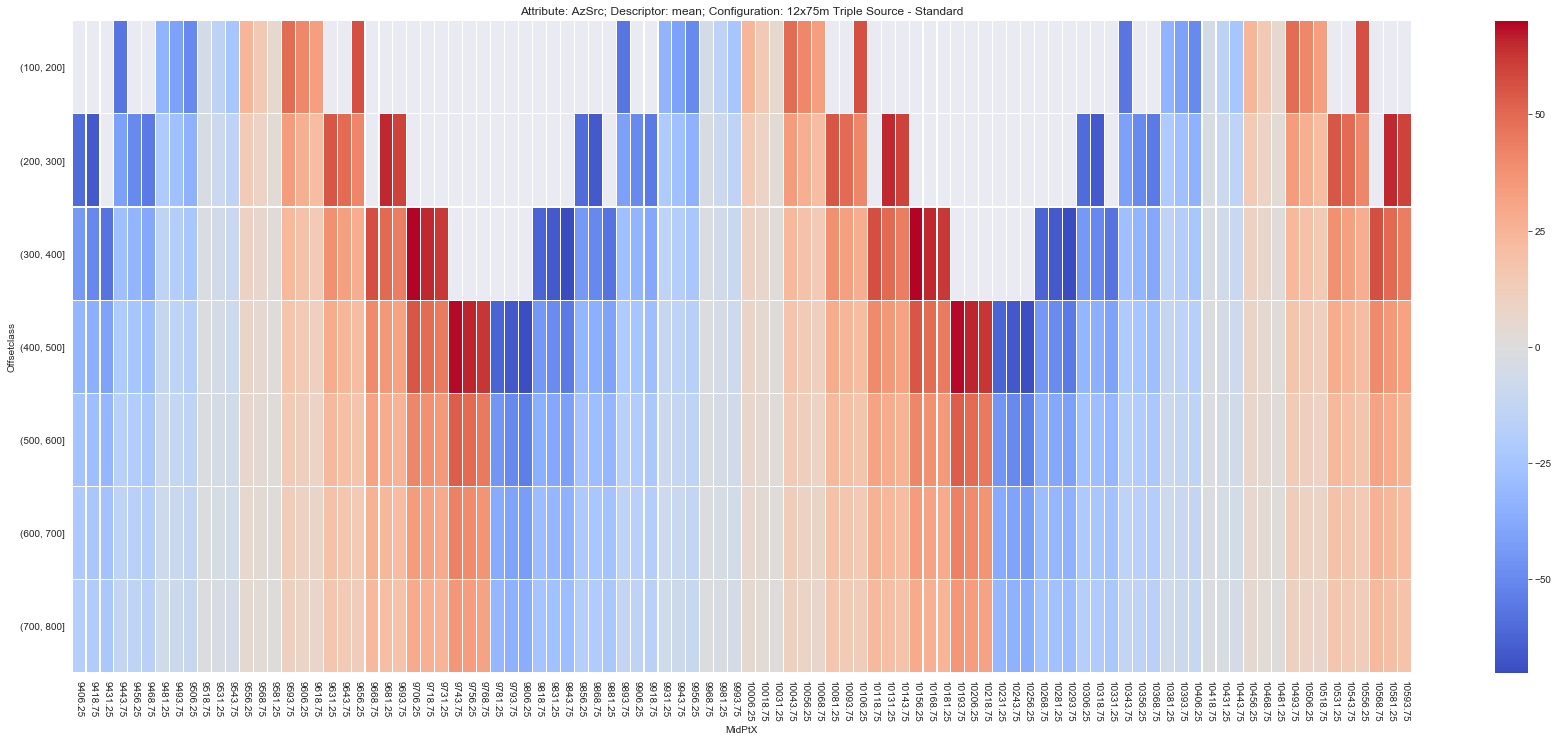

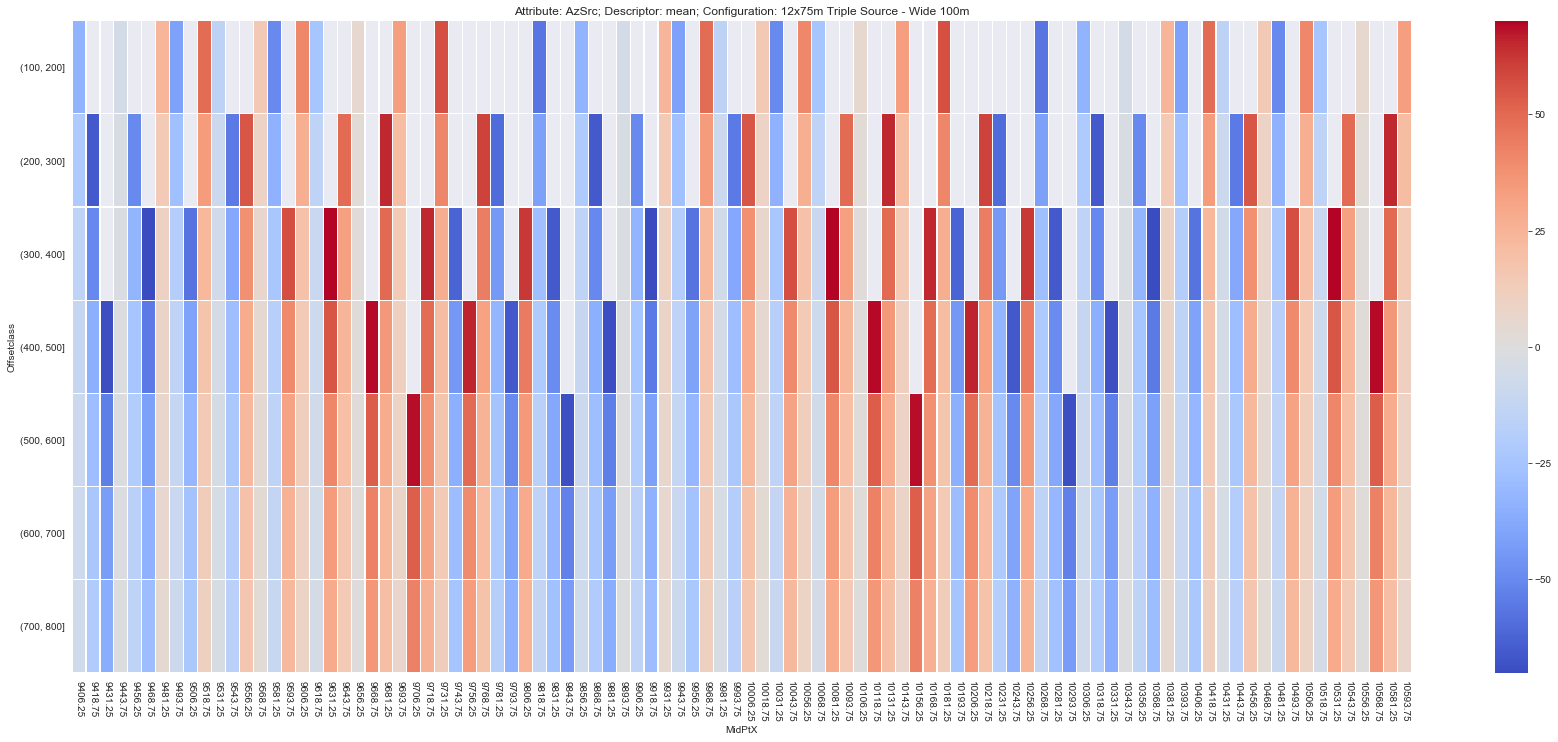

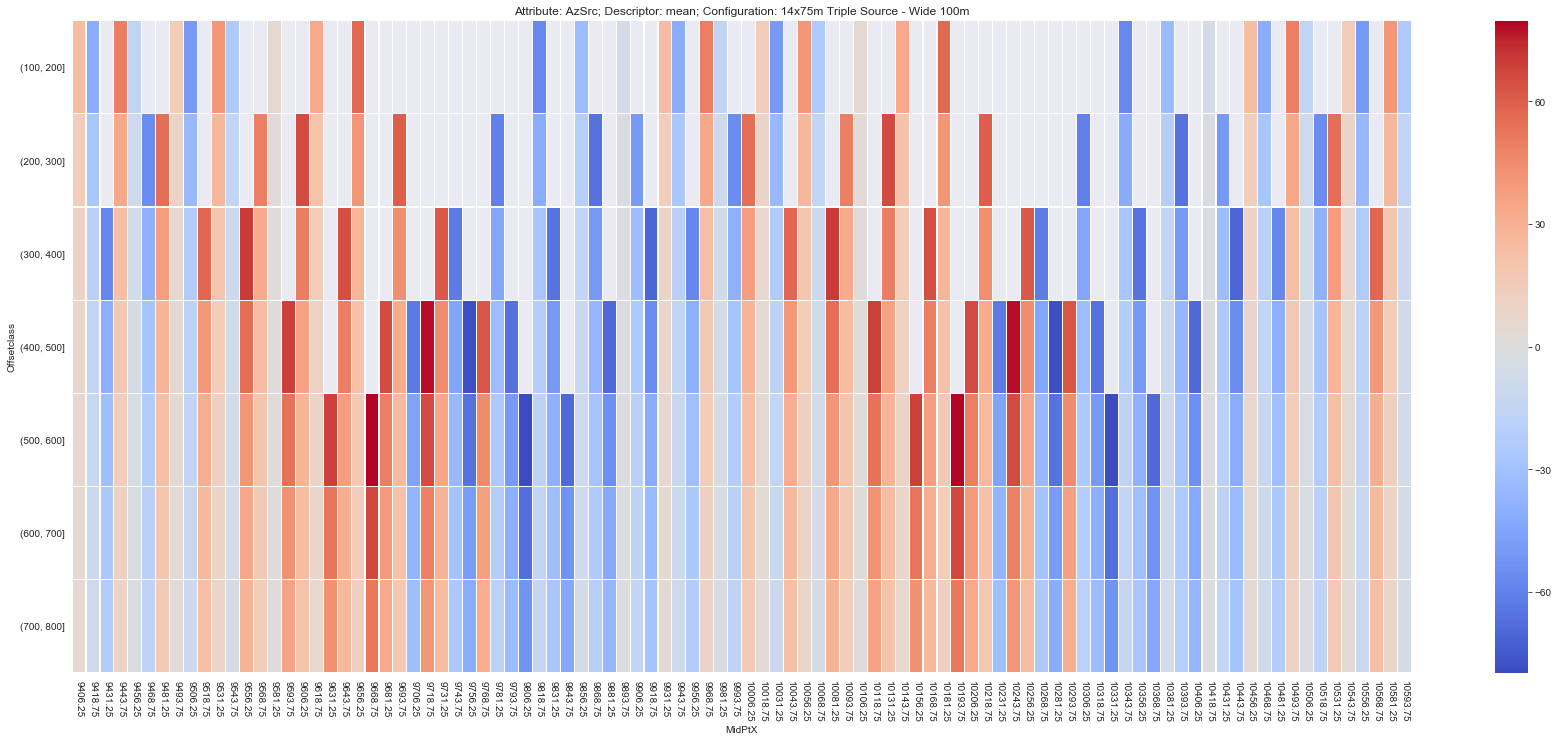

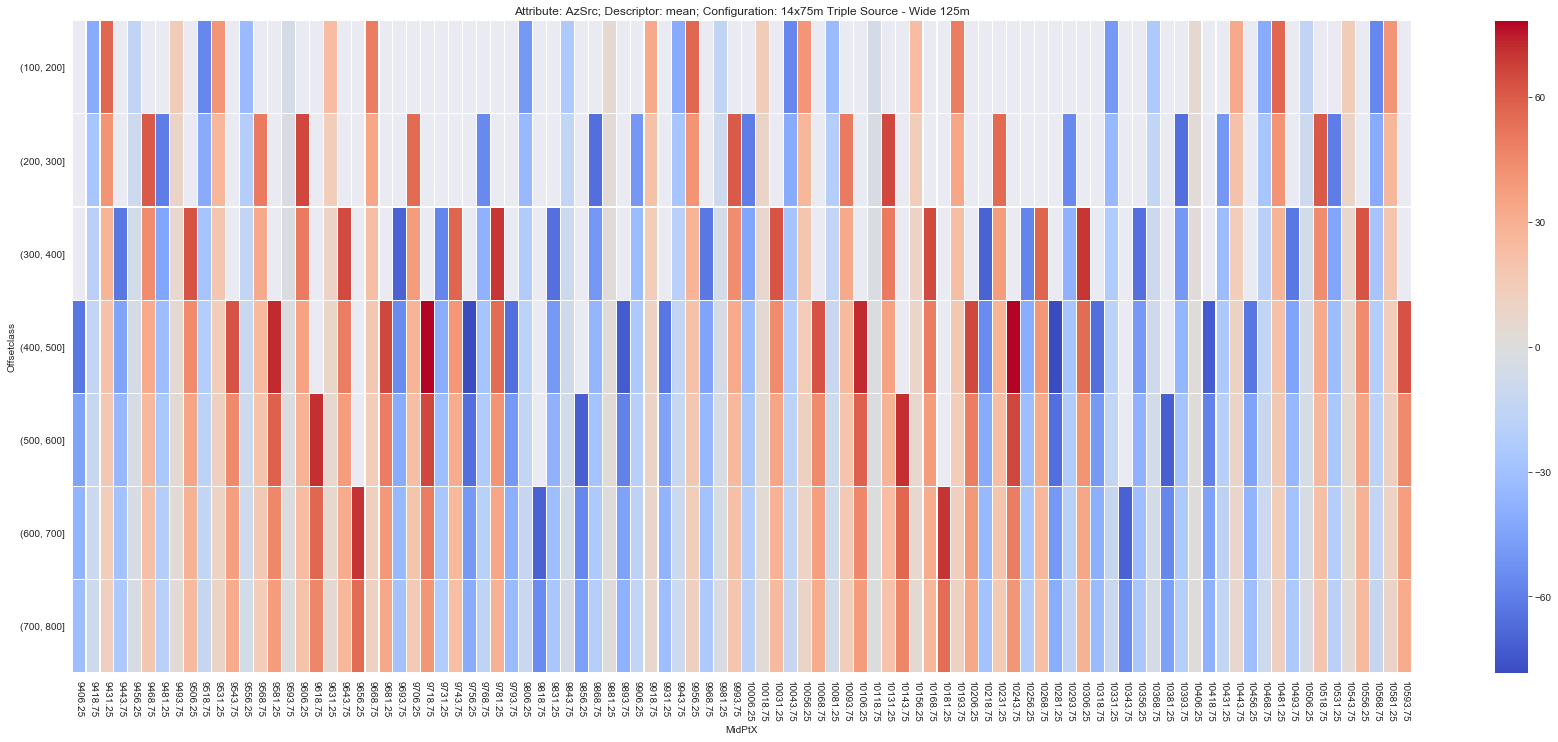

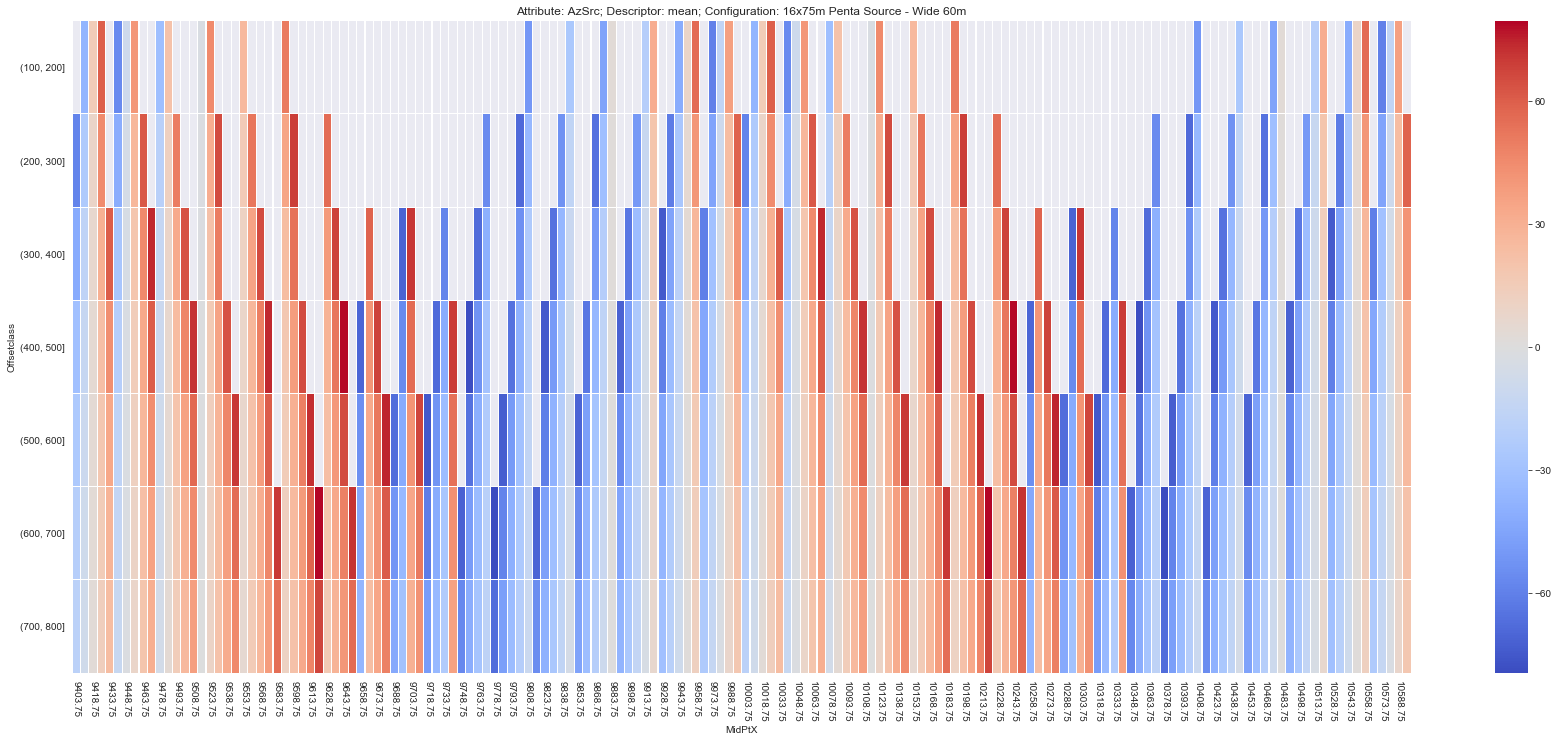

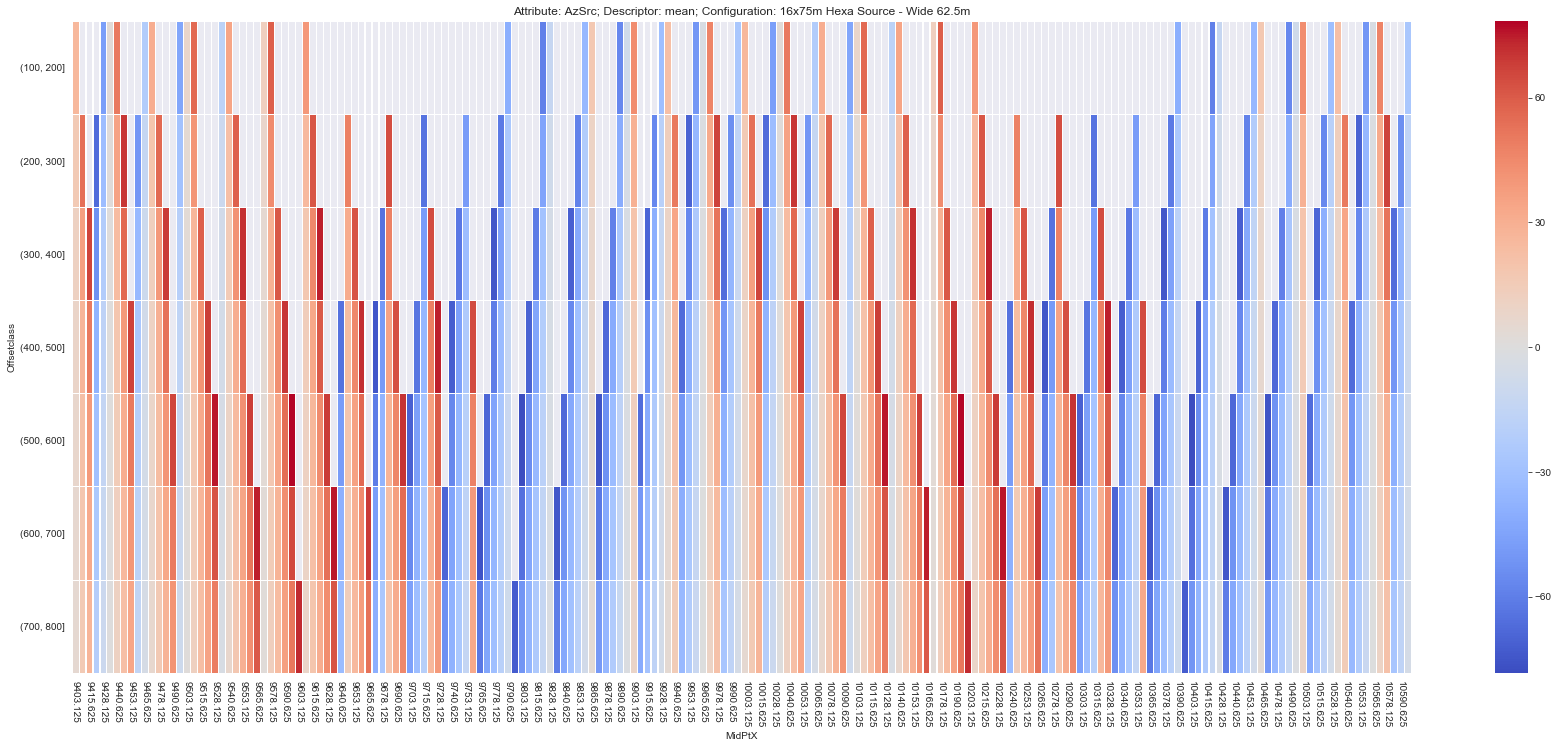

In [7]:
my_offset_data.plot_attrib(attrib='AzSrc', descriptor='mean', palette="coolwarm")

In [8]:
#my_offset_data.plot_offset_bins(palette='Reds', maxfold=18)

In [9]:
#my_offset_data.plot_attrib(attrib='Ttime', descriptor='mean', palette="coolwarm")

In [10]:
#list(my_offset_data.df_attribs_stats.columns)

In [11]:
#my_offset_data.df['MidPtX'].max()

In [12]:
#my_offset_data.x_limit(lower=10200, upper=11000)

In [13]:
#my_offset_data.plot_attrib(attrib='AzSrc', descriptor='50%', palette="coolwarm")

In [14]:
#my_offset_data.plot_swarm()

In [15]:
#my_offset_data.plot_offset_bins(palette='coolwarm', maxfold=18)

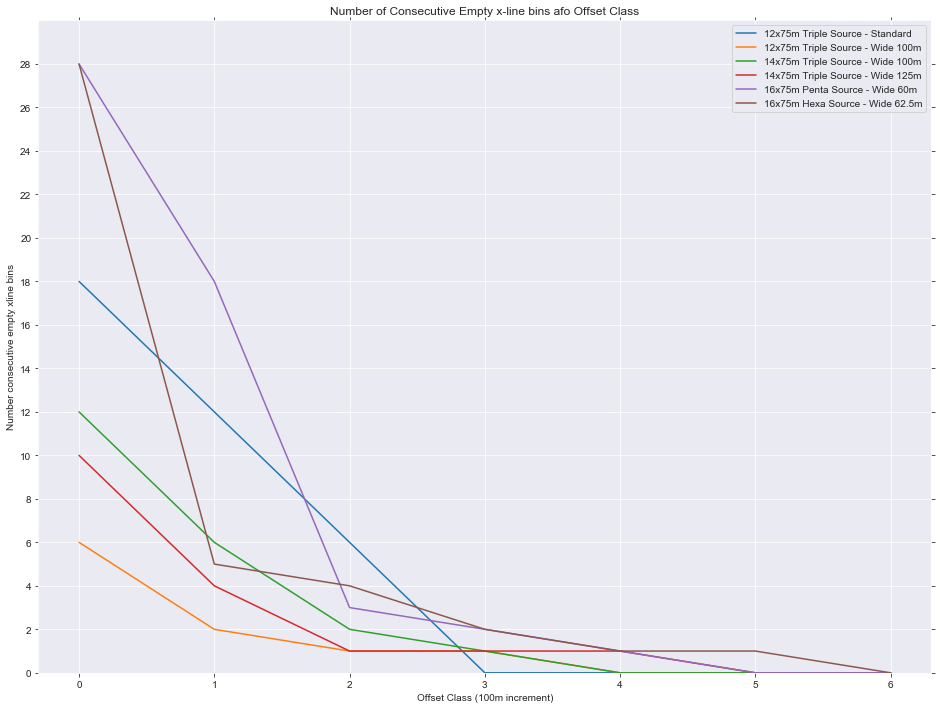

In [16]:
my_offset_data.plot_empty_bins(range=False, y_max=30)

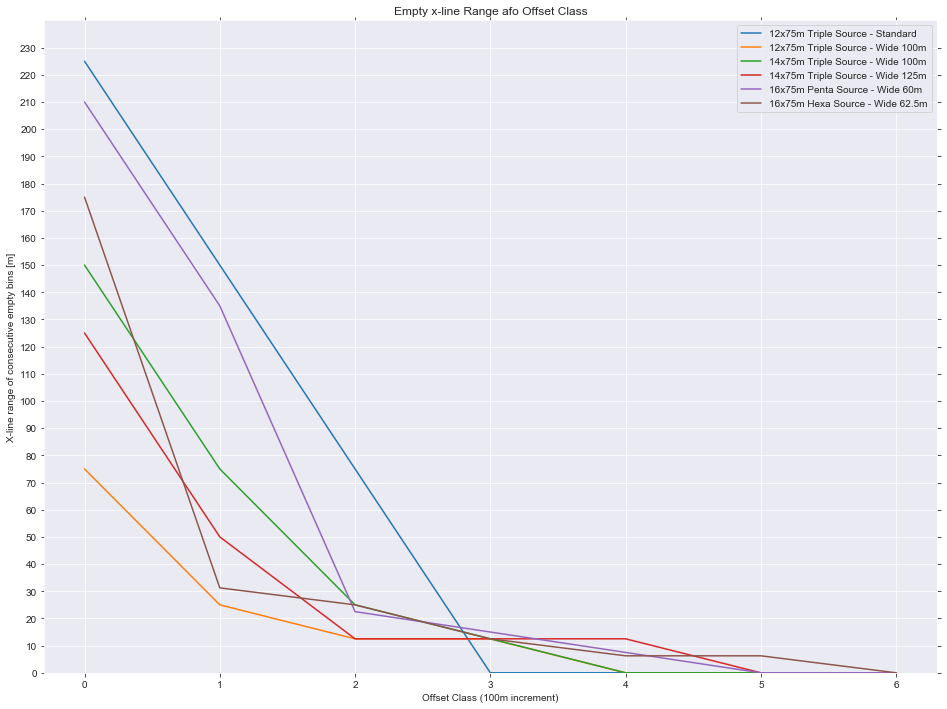

In [17]:
my_offset_data.plot_empty_bins(range=True, y_max=240)

In [18]:
my_offset_data.offset_planes[1]

Interval(200, 300, closed='right')

In [19]:
my_offset_data.offset_planes[6]

Interval(700, 800, closed='right')

In [20]:
my_offset_data.configurations

['12x75m Triple Source - Standard',
 '12x75m Triple Source - Wide 100m',
 '14x75m Triple Source - Wide 100m',
 '14x75m Triple Source - Wide 125m',
 '16x75m Penta Source - Wide 60m',
 '16x75m Hexa Source - Wide 62.5m']

In [21]:
#my_offset_data.x_limit(lower=10000, upper=10500)

In [22]:
#my_offset_data.plot_stat_for_offset_class(3, 'Standard Triple Source - 12x93.75', 'Ttime', descriptor='min', swarm=True)

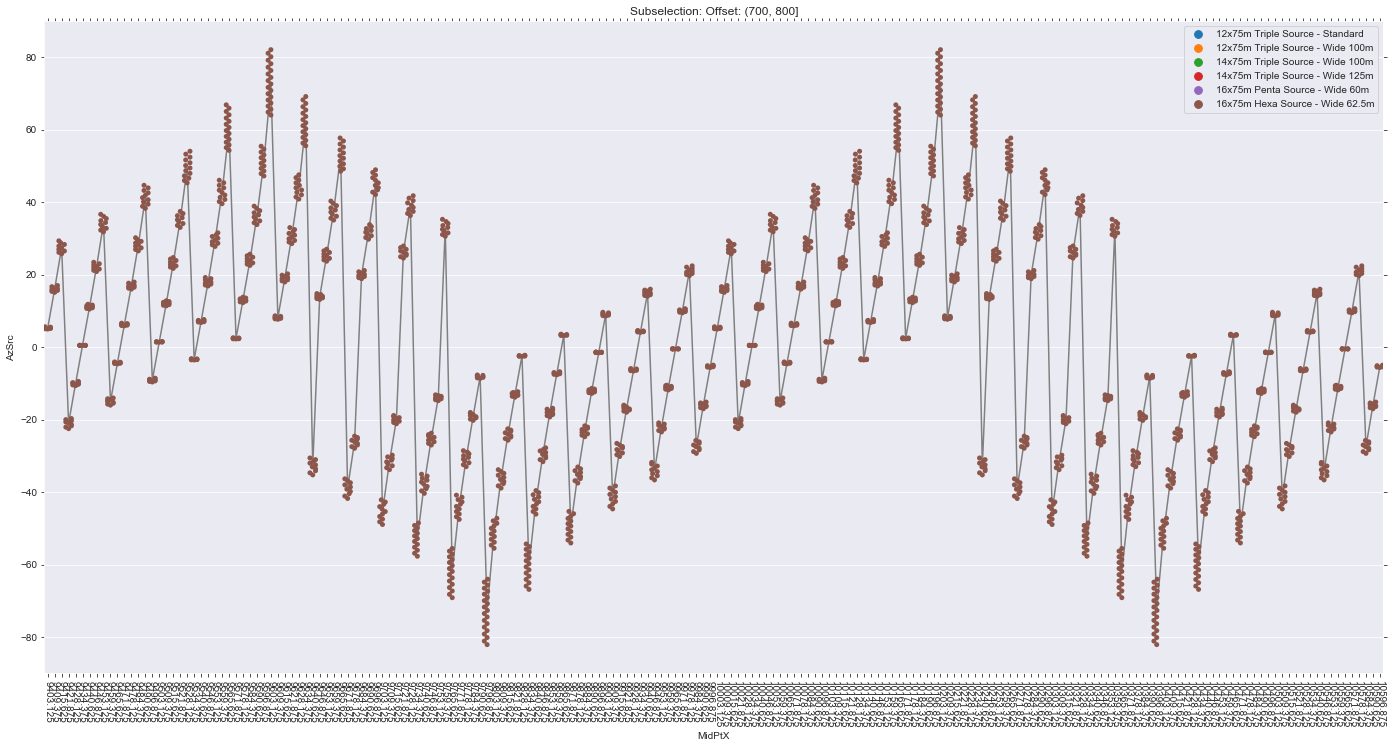

In [23]:
my_offset_data.plot_stat_for_offset_class(6, my_offset_data.configurations[5], 'AzSrc', descriptor='50%', swarm=True, y_lim=(-90, 90))


In [24]:
#my_offset_data.plot_stat_for_offset_class(1, 'Wide Tow Source - 12x93.75', 'Ttime')

In [25]:
#my_offset_data.plot_stat_for_offset_class(1, 'Standard Triple Source - 12x93.75', 'Ttime')

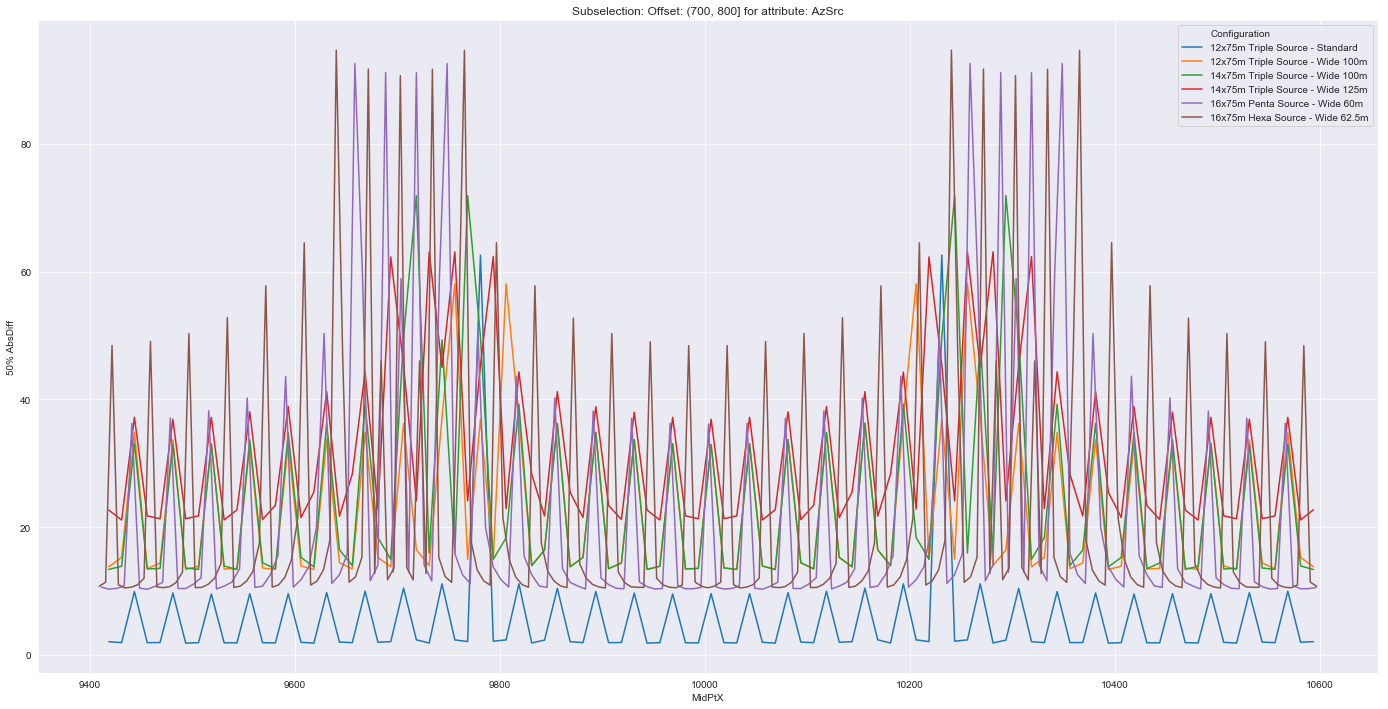

In [26]:
my_offset_data.plot_stat_for_offset_class_comp(6, 'AzSrc', '50%')

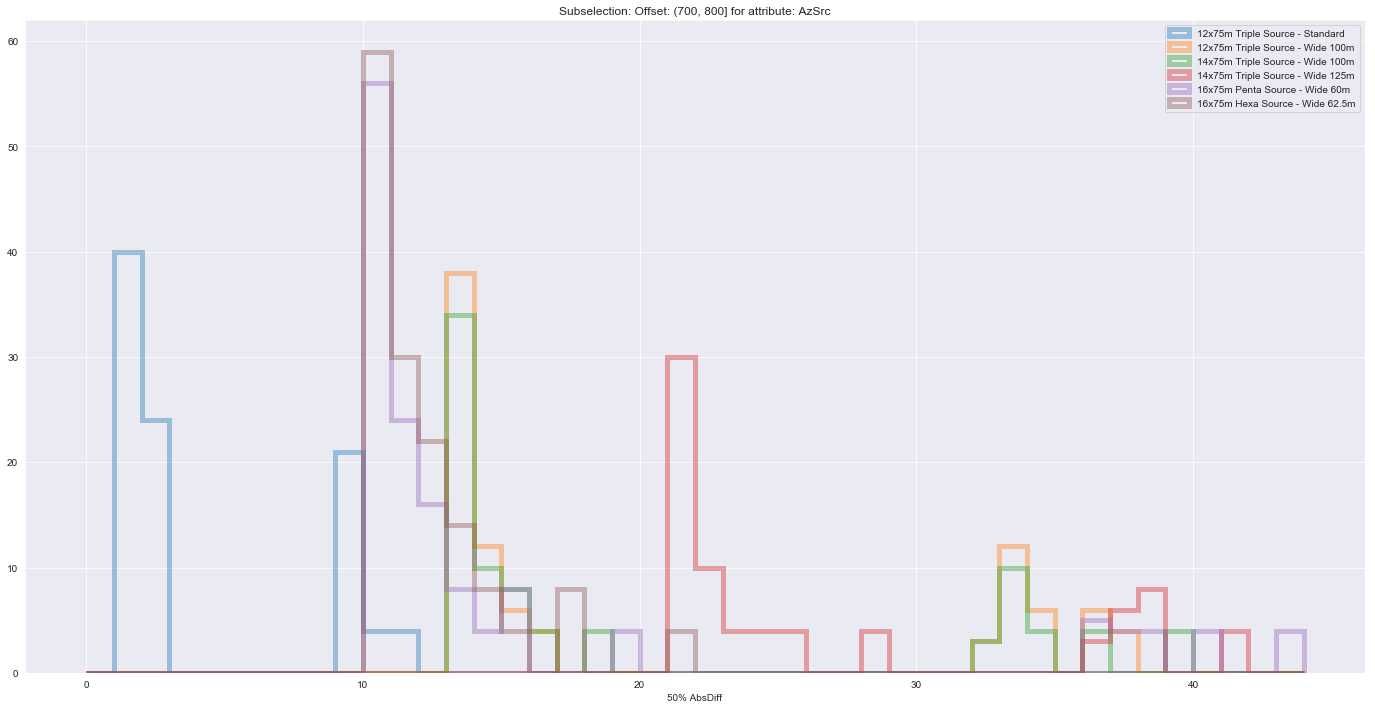

In [31]:
my_offset_data.plot_stat_for_offset_class_comp(6, 'AzSrc', '50%', dist=True, hist=True, histbins=(0, 45, 1), linewidth=5)

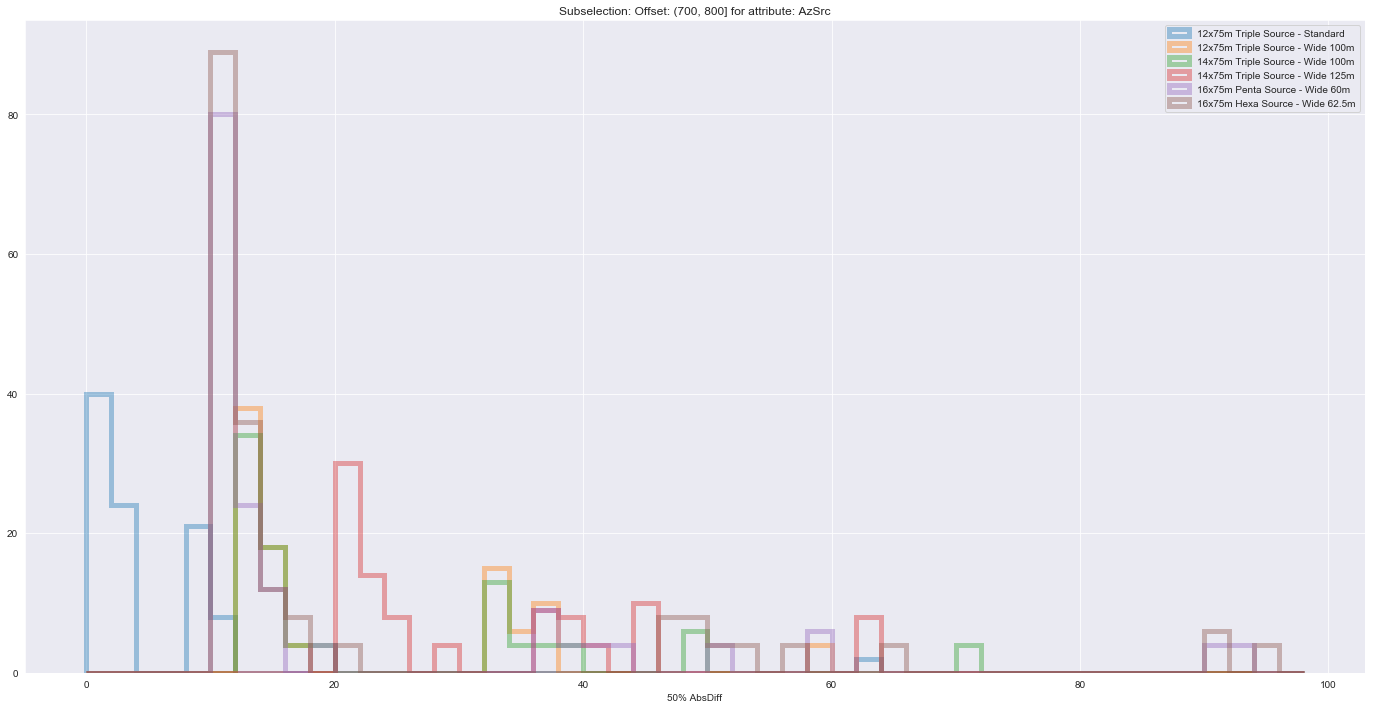

In [32]:
my_offset_data.plot_stat_for_offset_class_comp(6, 'AzSrc', '50%', dist=True, hist=True, histbins=(0, 100, 2), linewidth=5)

In [29]:
#my_offset_data.plot_stat_for_offset_class_comp(3, 'Ttime', '50%', hist=False, histbins=(0, 0.006, 0.0001))

In [30]:
stop

NameError: name 'stop' is not defined

In [ ]:
test_df = my_offset_data.df

In [ ]:
bin_list = list(range(0, 190, 10))

In [ ]:
bin_list

In [ ]:
my_offset_data.offset_planes[2]

In [ ]:
test_df[(test_df['MidPtX'] == 10312.5) & (test_df['Offsetclass'] == my_offset_data.offset_planes[3])][['AzSrc']]

In [ ]:
my_offset_data.configurations[0]

In [ ]:
def plot_hist(data, offsetplane, attrib):
    data_for_offsetplane = data.df[data.df['Offsetclass'] ==  data.offset_planes[offsetplane]]
    plt.figure(figsize=(24, 12))
    sns.set_style('darkgrid')
    #sns.lineplot(x='MidPtX', y=descriptor, data=df_temp_graph, hue='Configuration', hue_order=data.configurations)
    temp = pd.DataFrame()
    temp1 = data_for_offsetplane[data_for_offsetplane['Configuration'] == data.configurations[0]][[attrib]]
    temp2 = data_for_offsetplane[data_for_offsetplane['Configuration'] == data.configurations[1]][[attrib]]
    #print(temp.head())
    #print(temp.tail())
    plt.hist(temp1, label = data.configurations[0], bins=20)
    #sns.distplot(temp2, hist=False, label = data.configurations[1], bins=100)
    #plt.title(f"Subselection: Offset: {data.offset_planes[offsetplane]} for attribute: {attrib}")
    plt.show()

In [ ]:
plot_hist(my_offset_data, 1, 'AzSrc')

In [ ]:
test = test[test['Configuration'] == 'Wide Tow Source - Equinor - 12x75']
graph_test = graph_test[graph_test['Configuration'] == 'Wide Tow Source - Equinor - 12x75']

In [ ]:
print(np.sort(test['MidPtX'].unique()))

In [ ]:
print(np.sort(graph_test['MidPtX'].unique()))

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from geotools.input_tools import make_df_from_columndata

In [ ]:
path

In [ ]:
footprint_conv = make_df_from_columndata(path + '12x93,75mx6000m_4-500m.A1X')

In [ ]:
footprint_wide = make_df_from_columndata(path + '12x93mx8000m_WT250_4-500m.A1X')

In [ ]:
footprint_conv

In [ ]:
plt.figure(figsize=(24, 12))
sns.lineplot(x='CDP-Y', y='PickedRelAmplitude', data=footprint_conv)
sns.lineplot(x='CDP-Y', y='PickedRelAmplitude', data=footprint_wide)
plt.show()

In [ ]:
footprint_conv['Configuration'] = 'Conventional Sources'
footprint_wide['Configuration'] = 'Wide Sources'

In [ ]:
footprint = footprint_conv.append(footprint_wide).reset_index()

In [ ]:
footprint

In [ ]:
plt.figure(figsize=(24, 12))
sns.lineplot(x='CDP-Y', y='PickedRelAmplitude', hue='Configuration', data=footprint)
plt.show()

In [ ]:
footprint = footprint.rename(columns={'CDP-X': 'MidPtY', 'CDP-Y': 'MidPtX'})

In [ ]:
footprint

In [ ]:
plt.figure(figsize=(24, 12))
sns.lineplot(x='MidPtX', y='PickedAbsAmplitude', hue='Configuration', data=footprint)
plt.show()

In [ ]:
footprint['MidPtX'] = footprint['MidPtX'] + 835.9375

In [ ]:
footprint['style'] = 'Style'

In [ ]:
footprint = footprint[footprint['MidPtX'] >= 10000]
footprint = footprint[footprint['MidPtX'] <= 11750]

In [ ]:
plt.figure(figsize=(24, 12))
plt.xlim=(11000, 11750)
sns.lineplot(x='MidPtX', y='PickedRelAmplitude', hue='Configuration', data=footprint)
plt.show()

In [ ]:
my_offset_data.plot_stat_for_offset_class_comp(3, 'AzSrc', '50%')

In [ ]:
def stat_for_offset_class_comp_comb(data, footprint, offsetplane, attrib, descriptor):
    df_temp_graph = data.df_attribs_stats[(data.df_attribs_stats['Attribute'] == attrib) & (data.df_attribs_stats['Offsetclass'] == data.offset_planes[offsetplane])]
    #df_temp_graph = df_temp_graph[df_temp_graph['Configuration'] == config]
    #df_temp_graph['Style'] = 'style1'
    temp_footprint = footprint.copy(deep=True)
    temp_footprint['PickedRelAmplitude'] = temp_footprint['PickedRelAmplitude'] *40
    #temp_footprint['Style'] = 'style2'
    #joined = df_temp_graph.join(temp_footprint, on='MidPtX', how='outer', suffix='sfdfs')
    plt.figure(figsize=(24, 12))
    plt.xlim(10000, 11500)
    sns.set_style('darkgrid')
    sns.lineplot(x='MidPtX', y=descriptor, data=df_temp_graph, hue='Configuration', hue_order=data.configurations)
    sns.lineplot(x='MidPtX', y='PickedRelAmplitude', hue='Configuration', data=temp_footprint)
    plt.title(f"Subselection: Offset: {data.offset_planes[offsetplane]} for attribute: {attrib}")
    plt.show()

In [ ]:
stat_for_offset_class_comp_comb(my_offset_data, footprint, 3, 'Ttime', '50%')

In [ ]:
footprint['style']